In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
result=pd.read_csv('drug1.csv',encoding= 'unicode_escape')

In [4]:
result

,drug,dosage,condition,review,rating,usefulCount,bp,sugar,temperature,age,Sideeffects
0,Mirtazapine,15.00,Depression,"""I&#039;ve tried a few antidepressants over th...",10,22,normal,normal,97,30,dizziness
1,Mesalamine,250.00,Lymphocytic Colitis,"""I am newly diagnosed with LC, I am 38 years o...",8,23,abnormal,abnormal,97,22,headache
2,Bactrim,0.24,Urinary Tract Infection,"""Quick reduction of symptoms""",9,3,abnormal,abnormal,103,56,vomting
3,Contrave,8.00,Weight Loss,"""Contrave combines drugs that were used for al...",9,35,abnormal,abnormal,100,35,vomting and headache
4,LEVORA,0.15,Birth Control,"""I was on this pill for almost two years. It d...",2,3,abnormal,abnormal,97,30,headache and dizziness
...,...,...,...,...,...,...,...,...,...,...,...
394,Lo Loestrin Fe,1.00,Birth Control,"""Ive been on this pill for 9 months now and I ...",10,10,abnormal,abnormal,101,23,vomting
395,Ethinyl estradiol / norgestimate,0.25,Birth Control,"""I&#039;ve been on Sprintec for two months now...",5,2,abnormal,abnormal,102,18,vomting and headache
396,Guaifenesin / pseudoephedrine,60.00,Cough and Nasal Congestion,"""I have severe sinus problems all year long, b...",9,12,normal,normal,99,67,headache and dizziness
397,Glyburide,5.00,"Diabetes, Type 2","""I am taking 1/2 pill twice a day (5mg total) ...",9,11,normal,normal,97,72,weight gain


In [5]:
result.isnull().sum()

drug           0
dosage         0
condition      0
review         0
rating         0
usefulCount    0
bp             0
sugar          0
temperature    0
age            0
Sideeffects    0
dtype: int64

In [6]:
result.loc[result['bp']=='normal', 'bp'] =1
result.loc[result['bp']=='abnormal', 'bp'] = 2

result.loc[result['sugar']=='normal', 'sugar'] =1
result.loc[result['sugar']=='abnormal', 'sugar'] = 2




result.loc[result['condition']=='Depression', 'condition'] =1
result.loc[result['condition']=='Lymphocytic Colitis', 'condition'] =2
result.loc[result['condition']=='Urinary Tract Infection', 'condition'] =3
result.loc[result['condition']=='Weight Loss', 'condition'] =4
result.loc[result['condition']=='Birth Control', 'condition'] =5
result.loc[result['condition']=='Vaginal Yeast Infection', 'condition'] =6
result.loc[result['condition']=='Narcolepsy', 'condition'] =7
result.loc[result['condition']=='Insomnia', 'condition'] =8
result.loc[result['condition']=='Bipolar Disorde', 'condition'] =9
result.loc[result['condition']=='Hyperhidrosis', 'condition'] =10
result.loc[result['condition']=='Panic Disorde', 'condition'] =11
result.loc[result['condition']=='Rosacea', 'condition'] =12
result.loc[result['condition']=='Bowel Preparation', 'condition'] =13
result.loc[result['condition']=='Constipation, Drug Induced', 'condition'] =14
result.loc[result['condition']=='Diabetes, Type 2', 'condition'] =15
result.loc[result['condition']=='Pain', 'condition'] =16
result.loc[result['condition']=='Alcohol Dependence', 'condition'] =17
result.loc[result['condition']=='Emergency Contraception', 'condition'] =18
result.loc[result['condition']=='Major Depressive Disorde', 'condition'] =19
result.loc[result['condition']=='Anxiety', 'condition'] =20
result.loc[result['condition']=='Acne', 'condition'] =21
result.loc[result['condition']=='Cough and Nasal Congestion', 'condition'] =22







In [7]:
y1=result['drug']
y2 = result['dosage']
y3 = result['Sideeffects']
x=result[['bp','sugar','temperature','age','condition']]

In [8]:
#code to predict the drug -- dosage prediction code is implemented later
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y1,random_state=0)

In [9]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x, y1)

In [10]:
from sklearn.metrics import accuracy_score
y_pred_class = clf.predict(X_test)

print("Training Accuracy: ",clf.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.9866220735785953
Test Accuracy:  0.96


In [11]:
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test, y_pred_class))

                                  precision    recall  f1-score   support

                           Actos       1.00      1.00      1.00         3
                    Aripiprazole       1.00      1.00      1.00         1
                           Aubra       0.20      1.00      0.33         1
                         Bactrim       1.00      1.00      1.00         2
                           Beyaz       1.00      1.00      1.00         5
               Blisovi Fe 1 / 20       0.00      0.00      0.00         4
                         Campral       1.00      1.00      1.00         3
                   Ciprofloxacin       1.00      1.00      1.00         2
                      Clonazepam       1.00      1.00      1.00         4
                        Contrave       1.00      1.00      1.00         1
                      Duloxetine       1.00      1.00      1.00         1
                    Escitalopram       1.00      1.00      1.00         3
Ethinyl estradiol / etonogestrel     

C:\Users\saniv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saniv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saniv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 4]], dtype=int64)

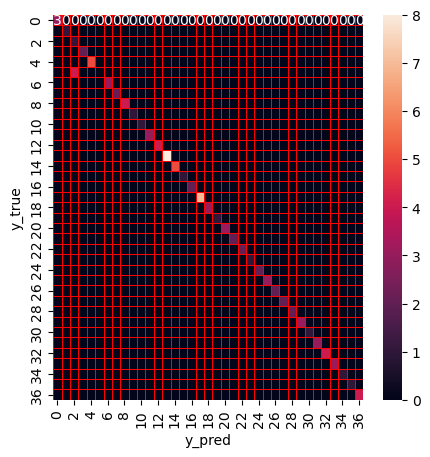

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
import pickle

pickle.dump(clf,open('drug.pkl','wb'))
crop = pickle.load(open('drug.pkl','rb'))

In [15]:
#code to predict the dosage prediction
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y2,random_state=0)

In [16]:
from sklearn import svm
clf = svm.SVR() 

# Train Decision Tree Classifer
clf = clf.fit(x, y2)

In [17]:
y_pred = clf.predict(X_test )
y_true=y_test

In [18]:
import pickle

pickle.dump(clf,open('dosage.pkl','wb'))
crop = pickle.load(open('dosage.pkl','rb'))
